In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Read the CSV file
df = pd.read_csv('1 - ScrapedPlaylist.csv')

In [3]:
# Checking for missing values in the entire dataset
missing_values = df.isnull().sum()
print(missing_values)

name            0
artist          0
artist_id       0
album           0
duration        0
release_date    0
popularity      0
track_url       0
image_url       1
genres          0
dtype: int64


In [4]:
# Delete artist_id column
df = df.drop('artist_id', axis=1)

In [5]:
# Convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

In [6]:
# Extract year from release_date
df['year'] = df['release_date'].dt.year

In [7]:
# Convert 'genres' column to string
df['genres'] = df['genres'].astype(str)
# Remove the square brackets and apostrophes from the 'genres' column
df['genres'] = df['genres'].str.replace('[', '').str.replace(']', '').str.replace("'", '')
# Fill Empty 'Genre' with 'Other'
df['genres'] = df['genres'].replace('', 'Other')
# Make every first word in 'genres' column capitalized
df['genres'] = df['genres'].str.title()

In [8]:
# Reorder columns to move 'track_url' to the end
columns = ['name', 'artist', 'album', 'duration', 'release_date', 'popularity', 'genres', 'year', 'image_url', 'track_url']
df = df[columns]

In [9]:
# Display summary statistics
print(df.describe())

          duration                   release_date   popularity         year
count  1193.000000                           1132  1193.000000  1132.000000
mean      3.851861  2012-12-08 11:38:22.473498368    39.143336  2012.478799
min       0.810000            1947-01-01 00:00:00     0.000000  1947.000000
25%       3.070000            2009-05-08 18:00:00    15.000000  2009.000000
50%       3.740000            2016-11-16 00:00:00    42.000000  2016.000000
75%       4.470000            2019-10-09 12:00:00    62.000000  2019.000000
max       9.650000            2024-02-09 00:00:00    91.000000  2024.000000
std       1.255044                            NaN    26.690975    10.990249


In [10]:
# Sum of the duration column
total_duration = df['duration'].sum()
total_hours = round(total_duration / 60, 2)
total_days = round(total_duration / 60 / 24, 2)
total_weeks = round(total_duration / 60 / 24 / 7, 2)
total_months = round(total_duration / 60 / 24 / 30, 2)
total_years = round(total_duration / 60 / 24 / 365, 2)

print(f"The total duration of all songs is {total_duration} minutes or {total_hours} hours or {total_days} days or {total_weeks} weeks or {total_months} months or {total_years} years.")

The total duration of all songs is 4595.27 minutes or 76.59 hours or 3.19 days or 0.46 weeks or 0.11 months or 0.01 years.


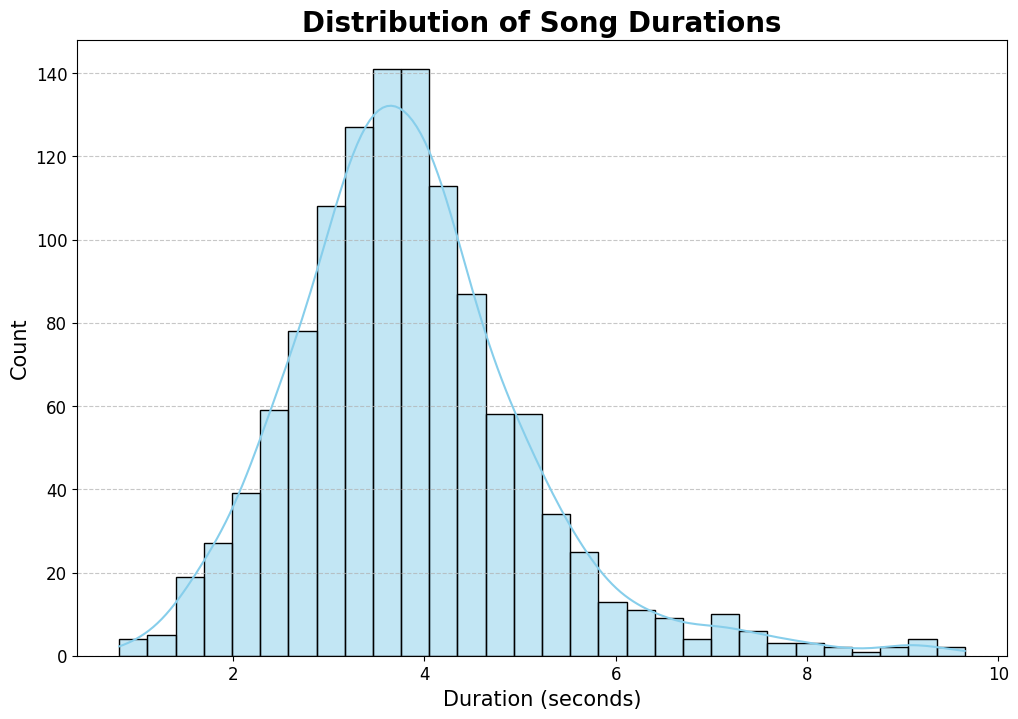

In [11]:
# Distribution of song durations with customizations
plt.figure(figsize=(12, 8))

# Create a histogram with a custom color palette and KDE
sns.histplot(df['duration'], bins=30, kde=True, color='skyblue', edgecolor='black')

# Customize the title and labels
plt.title('Distribution of Song Durations', fontsize=20, fontweight='bold')
plt.xlabel('Duration (seconds)', fontsize=15)
plt.ylabel('Count', fontsize=15)

# Customize the tick parameters
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

C:\Users\JasonFaeq\AppData\Local\Temp\ipykernel_40564\2909130690.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')


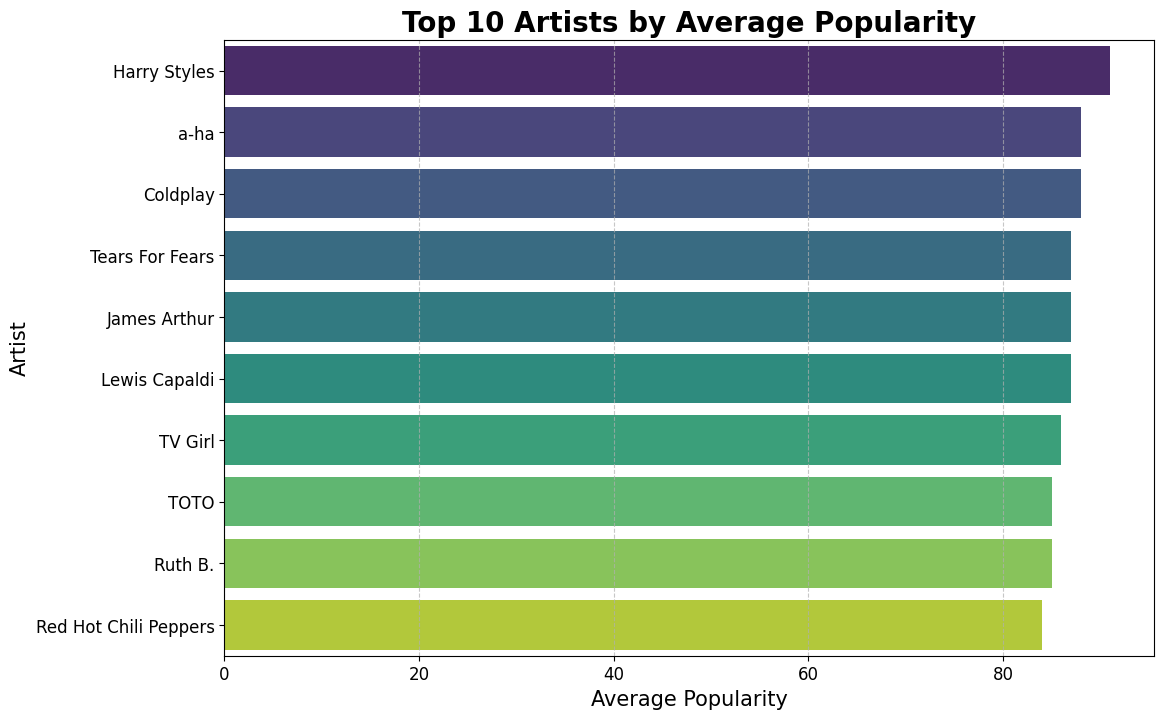

In [12]:
# Calculate top 10 artists by average popularity
top_artists = df.groupby('artist')['popularity'].mean().sort_values(ascending=False).head(10)

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a bar plot with a custom color palette
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')

# Customize the title and labels
plt.title('Top 10 Artists by Average Popularity', fontsize=20, fontweight='bold')
plt.xlabel('Average Popularity', fontsize=15)
plt.ylabel('Artist', fontsize=15)

# Customize the tick parameters
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [13]:
# Interactive scatter plot of popularity vs. duration with custom colors
fig = px.scatter(
    df, 
    x='duration', 
    y='popularity', 
    hover_data=['name', 'artist'], 
    title='Popularity vs. Duration',
    color='popularity',  
    color_continuous_scale='Viridis' 
)

# Customize the layout
fig.update_layout(
    xaxis_title='Duration',
    yaxis_title='Popularity',
    title_font_size=20,
    template='plotly_dark' 
)

fig.show()

In [14]:
# Interactive bar chart of top 25 artists with custom colors
top_artists = df['artist'].value_counts().head(25).reset_index()
top_artists.columns = ['artist', 'count']

fig = px.bar(
    top_artists, 
    x='artist', 
    y='count', 
    title='Top 25 Most Frequent Artists',
    color='count', 
    color_continuous_scale='Viridis' 
)

# Customize the layout
fig.update_layout(
    xaxis_title='Artist',
    yaxis_title='Count',
    title_font_size=20,
    xaxis_tickangle=-45,
    template='plotly_dark'
)

fig.show()

In [15]:
# Gorillaz Songs in the playlist (only song name and album)
gorillaz_songs = df[df['artist'] == 'Gorillaz'][['name', 'album']]

# Display the Gorillaz songs
print(gorillaz_songs)

                                                   name  \
104                                      Feel Good Inc.   
594                                                DARE   
596               Bobby in Phoenix (feat. Bobby Womack)   
598                                              Kansas   
599                                           El Mañana   
884                                  On Melancholy Hill   
1008  Out of Body (feat. Kilo Kish, Zebra Katz & Ima...   
1034                             The Speak It Mountains   
1035   Circle of Friendz (feat. Brandon Markell Holmes)   
1036                                          Hong Kong   
1037                                    Busted and Blue   

                          album  
104                  Demon Days  
594                  Demon Days  
596                    The Fall  
598                 The Now Now  
599                  Demon Days  
884               Plastic Beach  
1008            Humanz (Deluxe)  
1034               

In [16]:
# The Longest Song
longest_song = df['duration'].idxmax()
print(f"The longest song is {df['name'][longest_song]} by {df['artist'][longest_song]} with a duration of {df['duration'][longest_song]} minutes.\n")
# The Shortest Song
shortest_song = df['duration'].idxmin()
print(f"The shortest song is {df['name'][shortest_song]} by {df['artist'][shortest_song]} with a duration of {df['duration'][shortest_song]} minutes.\n")
# The Most Popular Song
most_popular_song = df['popularity'].idxmax()
print(f"The most popular song is {df['name'][most_popular_song]} by {df['artist'][most_popular_song]} with a popularity of {df['popularity'][most_popular_song]}.\n")
# The Least Popular Song
least_popular_song = df['popularity'].idxmin()
print(f"The least popular song is {df['name'][least_popular_song]} by {df['artist'][least_popular_song]} with a popularity of {df['popularity'][least_popular_song]}.\n")
# The Most Popular Album
most_popular_album = df.groupby('album')['popularity'].mean().idxmax()
print(f"The most popular album is {most_popular_album} by {df['artist'][df['album'] == most_popular_album].iloc[0]}.\n")
# The Least Popular Album
least_popular_album = df.groupby('album')['popularity'].mean().idxmin()
print(f"The least popular album is {least_popular_album} by {df['artist'][df['album'] == least_popular_album].iloc[0]}.\n")

The longest song is Dance with the Devil by Immortal Technique with a duration of 9.65 minutes.

The shortest song is Select.Wav by ESPRIT 空想 with a duration of 0.81 minutes.

The most popular song is As It Was by Harry Styles with a popularity of 91.

The least popular song is Welcome To Los Santos by Oh No with a popularity of 0.

The most popular album is Harry's House by Harry Styles.

The least popular album is "Eggs" by Strawberry Milk Cult.



In [17]:
df.to_csv('2 - AnalysedPlayList.csv', index=False)